In [10]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io.img_tiles import Stamen, GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import datetime
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D as Line
from matplotlib.patheffects import Stroke
import matplotlib.ticker as mticker
import numpy as np
import shapely.geometry as sgeom
from shapely.ops import transform as geom_transform
import pandas as pd
import sb_tools
import cmocean
import netCDF4 as nc



In [11]:
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# load topography

In [12]:
BS_topo = nc.Dataset("C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/ARCTOScruise/BarentsSeaBathy.nc")

In [13]:
# Focus topo to interest region


lat_lim = [70, 80]
lon_lim = [5, 45]

lat_lim_index = (BS_topo.variables['lat'][:].data>lat_lim[0]) & (BS_topo.variables['lat'][:].data<lat_lim[1])
lon_lim_index = (BS_topo.variables['lon'][:].data>lon_lim[0]) & (BS_topo.variables['lon'][:].data<lon_lim[1])

lats = BS_topo.variables['lat'][:].data[lat_lim_index]
lons = BS_topo.variables['lon'][:].data[lon_lim_index]
bathy_lat = BS_topo.variables['elevation'][:].data[lat_lim_index,:]
bathy = bathy_lat[:,lon_lim_index]*-1
bathy[bathy < 0] = 1 

# Load data

In [147]:
SB_Echo22 = pd.read_excel("E:/PolarFront2022/2022-05/sailbuoy/2022_polarfront_sb_echo_1/datalogger/DATA_SBEcho2022_PF.xlsx", header=0, usecols=['Time','Lat','Long'])
SB_Iskant = pd.read_excel("E:/PolarFront2022/2022-05/sailbuoy/2022_polarfront_sb_iskant/datalogger/DATA_SBIskant2022_PF.xlsx", header=0, usecols=['Time','Lat','Long'])
SB_ADCP22 = pd.read_excel("E:/PolarFront2022/2022-05/sailbuoy/2022_polarfront_sb_adcp/datalogger/DATA_SBADCP2022_PF.xlsx", header=0, usecols=['Time','Lat','Long'])

In [148]:
SB_Iskant['Time'] = pd.to_datetime(SB_Iskant.Time)
SB_Echo22['Time'] = pd.to_datetime(SB_Echo22.Time)
SB_ADCP22['Time'] = pd.to_datetime(SB_Echo22.Time)

In [149]:
SB_Iskant21 = SB_Iskant[SB_Iskant.Time<'2022']
SB_Iskant22 = SB_Iskant[SB_Iskant.Time>'2022']

# Map zoom

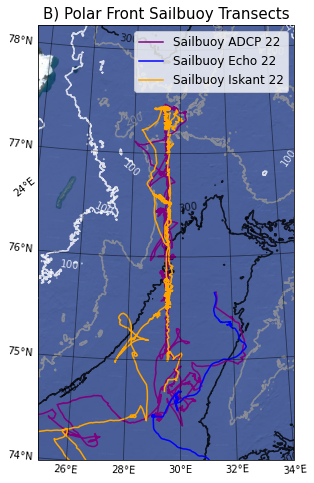

In [150]:
fig   = plt.figure(figsize=(6,8))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 30, central_latitude = 75)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent_zoom=[25, 34, 74, 78.2]
ax.set_extent(extent_zoom, crs = ccrs.PlateCarree())

cs = ax.contour(lons,lats,bathy, levels=[100, 200, 300], cmap='Greys', alpha = 0.8, transform=ccrs.PlateCarree())
plt.clabel(cs)

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
plt.plot(SB_ADCP22['Long'], SB_ADCP22['Lat'], 'purple', transform=ccrs.PlateCarree(), label='Sailbuoy ADCP 22')
plt.plot(SB_Echo22['Long'], SB_Echo22['Lat'], 'blue', transform=ccrs.PlateCarree(), label='Sailbuoy Echo 22')
plt.plot(SB_Iskant22['Long'], SB_Iskant22['Lat'], 'orange', transform=ccrs.PlateCarree(), label='Sailbuoy Iskant 22')


ax.set_title('B) Polar Front Sailbuoy Transects', title_font)
plt.legend(fontsize=12)

fig.savefig('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/PolarFront/HH_May2022/SB_transects22_zoom.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

# Make map 2022

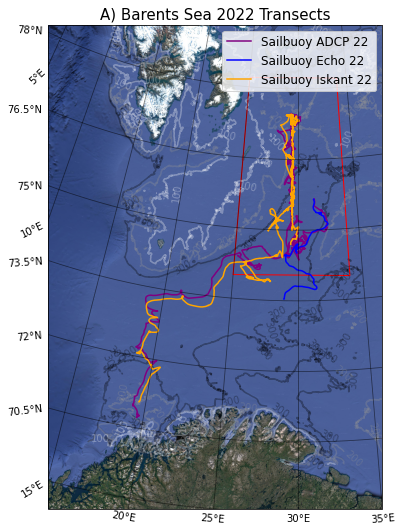

In [153]:
fig   = plt.figure(figsize=(6,12))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 30, central_latitude = 75)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[15, 35, 69, 79]
ax.set_extent(extent, crs = ccrs.PlateCarree())

cs = ax.contour(lons,lats,bathy, levels=[100, 200, 300], cmap='Greys', alpha = 0.3, transform=ccrs.PlateCarree())
plt.clabel(cs)

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects

plt.plot(SB_ADCP22['Long'], SB_ADCP22['Lat'], 'purple', transform=ccrs.PlateCarree(), label='Sailbuoy ADCP 22')
plt.plot(SB_Echo22['Long'], SB_Echo22['Lat'], 'blue', transform=ccrs.PlateCarree(), label='Sailbuoy Echo 22')
plt.plot(SB_Iskant22['Long'], SB_Iskant22['Lat'], 'orange', transform=ccrs.PlateCarree(), label='Sailbuoy Iskant 22')



# zoom box
extent_box = sgeom.box(extent_zoom[0], extent_zoom[2], extent_zoom[1], extent_zoom[3])
ax.add_geometries([extent_box], ccrs.PlateCarree(), facecolor='none',
                      edgecolor='red', linewidth=1)
ax.set_title('A) Barents Sea 2022 Transects', title_font)
plt.legend(fontsize=12)

fig.savefig('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/PolarFront/HH_May2022/SB_transects22.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

## Map Sailbuoys 21/22

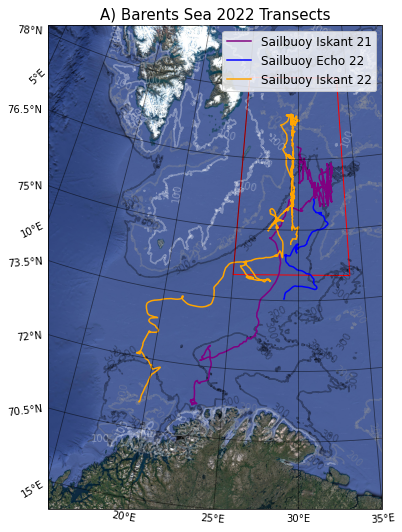

In [154]:
fig   = plt.figure(figsize=(6,12))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 30, central_latitude = 75)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[15, 35, 69, 79]
ax.set_extent(extent, crs = ccrs.PlateCarree())

cs = ax.contour(lons,lats,bathy, levels=[100, 200, 300], cmap='Greys', alpha = 0.3, transform=ccrs.PlateCarree())
plt.clabel(cs)

# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects

plt.plot(SB_Iskant21['Long'], SB_Iskant21['Lat'], 'purple', transform=ccrs.PlateCarree(), label='Sailbuoy Iskant 21')
plt.plot(SB_Echo22['Long'], SB_Echo22['Lat'], 'blue', transform=ccrs.PlateCarree(), label='Sailbuoy Echo 22')
plt.plot(SB_Iskant22['Long'], SB_Iskant22['Lat'], 'orange', transform=ccrs.PlateCarree(), label='Sailbuoy Iskant 22')



# zoom box
extent_box = sgeom.box(extent_zoom[0], extent_zoom[2], extent_zoom[1], extent_zoom[3])
ax.add_geometries([extent_box], ccrs.PlateCarree(), facecolor='none',
                      edgecolor='red', linewidth=1)
ax.set_title('A) Barents Sea 2022 Transects', title_font)
plt.legend(fontsize=12)

fig.savefig('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/PolarFront/HH_May2022/SB_transects21_22.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')